In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
ITERATION_COUNT = 200.0

In [3]:
color_psu_nittany_navy = '#001e44'
color_psu_beaver_blue = '#1e407c'
color_psu_pugh_blue = '#96bee6'

color_psu_white_out = '#ffffff'

In [4]:
def won(df):
    return df[df['Max Tile'] > 1024]

# Plotting

In [5]:
def line_plot(x, y, color = color_psu_beaver_blue):
    xs = [str(xi) for xi in x]
    fig, ax1 = plt.subplots()
    fig.set_figwidth(6)
    fig.set_figheight(3)
    
    l1 = ax1.plot(xs, y, color = color, linewidth = 5)

    plt.tick_params(axis='y', colors='dimgrey')
    plt.tick_params(axis='x', colors='dimgrey')

    for pos in ['right', 'top', 'left']:
        plt.gca().spines[pos].set_visible(False)
        
    plt.grid(axis = 'y', color = 'lightgrey')
    plt.show()

In [6]:
def bar_chart(x, y):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(4)
    fig.set_figheight(3)

    colors = [
        color_psu_pugh_blue,        
        color_psu_beaver_blue,
        color_psu_nittany_navy,        
    ]

    for pos in ['right', 'top', 'left']:
        plt.gca().spines[pos].set_visible(False)
    
    for i in range(0, len(y)):
        yi = y[i]
        ax1.bar(i * 1, yi, color = colors[i])

    xticks = [i * 1 for i in range(0, len(x))]
    ax1.set_xticks(xticks, x)

    plt.grid(axis = 'y', color = 'lightgrey')
    plt.show()

In [7]:
def grouped_bar_chart(x_groups, y_groups, group_labels, yticks = None):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)

    colors = [
        color_psu_white_out,
        color_psu_pugh_blue,        
        color_psu_beaver_blue,
    ]

    for pos in ['right', 'top', 'left']:
        plt.gca().spines[pos].set_visible(False)
    
    k = 0
    xticks = []
    legends = []
    
    for i in range(0, len(y_groups)):
        y_group = y_groups[i]
        legends.append(
            mpatches.Patch(color = colors[i], label = group_labels[i])
        )
        
        for j in range(0, len(y_group)):
            yj = y_group[j]
            ax1.bar(k * 1, yj, color = colors[i])
            xticks.append(x_groups[i][j])
            k += 1

        if i < len(y_groups) - 1:
            ax1.bar(k * 1, 0, color = 'white')
            xticks.append("")
 
        k += 1

    ax1.set_xticks([i * 1 for i in range(0, len(xticks))], xticks)
    
    if not yticks is None:
        ax1.set_yticks(yticks)

    plt.legend(handles = legends)
    
    plt.grid(axis = 'y', color = 'lightgrey')
    plt.show()

# Data Load

In [8]:
df_random = pd.read_csv('./data/results-random.csv')
df_expectimax_3 = pd.read_csv('./data/results-expectimax-5444-3.csv')
df_expectimax_4 = pd.read_csv('./data/results-expectimax-5444-4.csv')
df_expectimax_5 = pd.read_csv('./data/results-expectimax-5444-5.csv')
df_mcts_48 = pd.read_csv('./data/results-mcts-4440-48.csv')
df_mcts_96 = pd.read_csv('./data/results-mcts-4440-96.csv')
df_mcts_192 = pd.read_csv('./data/results-mcts-4440-192.csv')
df_mcts_384 = pd.read_csv('./data/results-mcts-4440-384.csv')

In [9]:
df_expectimax_eval = pd.read_csv('./data/eval-expectimax-3.csv').set_axis(['id', '0', '1', '2', '3', 'avg_max', 'max', 'avg_its', 'max_its'], axis = 1).set_index(['id'])
df_mcts_eval = pd.read_csv('./data/eval-mcts-48.csv').set_axis(['id', '0', '1', '2', '3', 'avg_max', 'max', 'avg_its', 'max_its'], axis = 1).set_index(['id'])

# Overall performance

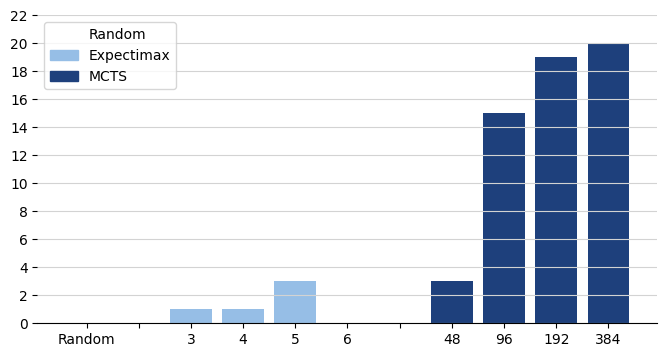

In [10]:
grouped_bar_chart([["Random"], ["3", "4", "5", "6"], ["48", "96", "192", "384"]], [[0], [
        won(df_expectimax_3).count()['Max Tile'],    
        won(df_expectimax_4).count()['Max Tile'],    
        won(df_expectimax_5).count()['Max Tile'],    
        0
    ], [
        won(df_mcts_48).count()['Max Tile'],    
        won(df_mcts_96).count()['Max Tile'],    
        won(df_mcts_192).count()['Max Tile'],   
        won(df_mcts_384).count()['Max Tile'],  
    ]],
  ["Random", "Expectimax", "MCTS"], [i for i in range(0, 24, 2)]
 )

# Evaluation Function Fitting

## Number of functions that won

In [11]:
df_expectimax_eval[df_expectimax_eval['max'] > 1024].count()['0']

np.int64(5)

In [12]:
df_mcts_eval[df_mcts_eval['max'] > 1024].count()['0']

np.int64(15)

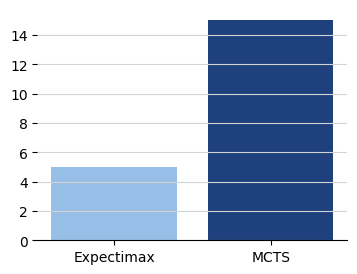

In [13]:
bar_chart(["Expectimax", "MCTS"], [
    df_expectimax_eval[df_expectimax_eval['max'] > 1024].count()['0'],
    df_mcts_eval[df_mcts_eval['max'] > 1024].count()['0']
])

## Best function powers of 2

As defined by achieving the mighest average number of iterations

In [14]:
df_expectimax_eval.sort_values(['avg_its'], ascending = False).iloc[0]

0             5.000000
1             4.000000
2             4.000000
3             4.000000
avg_max     938.666667
max        1024.000000
avg_its     278.625000
max_its     911.000000
Name: 1037, dtype: float64

In [15]:
df_mcts_eval.sort_values(['avg_its'], ascending = False).iloc[0]

0             4.000000
1             4.000000
2             4.000000
3             0.000000
avg_max    1109.333333
max        2048.000000
avg_its     351.250000
max_its    1674.000000
Name: 1032, dtype: float64

## Winning parameters durring fitting

In [16]:
df_mcts_eval[df_mcts_eval['max'] > 1024].sort_values(['avg_its'], ascending=False)

,0,1,2,3,avg_max,max,avg_its,max_its
id,,,,,,,,
1032,4,4,4,0,1109.333333,2048,351.2500,1674
708,3,1,4,0,1109.333333,2048,328.5625,1420
1218,5,3,5,0,1024.000000,2048,313.1250,1387
660,3,0,2,0,1024.000000,2048,302.3125,1239
774,3,3,3,0,938.666667,2048,295.9375,1634
1164,5,2,2,0,1024.000000,2048,293.5625,1232
253,1,1,0,1,938.666667,2048,275.8125,1402
408,1,5,2,0,853.333333,2048,255.1875,1346
702,3,1,3,0,810.666667,2048,252.5625,1532


In [17]:
df_expectimax_eval[df_expectimax_eval['max'] > 1024].sort_values(['avg_its'], ascending=False)

,0,1,2,3,avg_max,max,avg_its,max_its
id,,,,,,,,
1109,5,4,0,5,1024.000000,2048,263.9375,1111
1168,4,2,2,5,896.000000,2048,243.6250,1239
489,3,3,1,2,768.000000,2048,212.0625,1222
958,4,3,2,4,768.000000,2048,211.1250,1098
305,5,2,2,1,725.333333,2048,194.1250,1161


## Best parameters by avg max tile

In [18]:
df_expectimax_eval.sort_values(['avg_its'], ascending=False).head(5)

,0,1,2,3,avg_max,max,avg_its,max_its
id,,,,,,,,
1037,5,4,4,4,938.666667,1024,278.6250,911
110,2,0,3,0,1024.000000,1024,274.1875,840
1109,5,4,0,5,1024.000000,2048,263.9375,1111
807,3,2,4,3,768.000000,1024,262.3750,972
1145,5,4,1,5,938.666667,1024,256.3750,866


In [19]:
df_mcts_eval.sort_values(['avg_its'], ascending=False).head(5)

,0,1,2,3,avg_max,max,avg_its,max_its
id,,,,,,,,
1032,4,4,4,0,1109.333333,2048,351.2500,1674
708,3,1,4,0,1109.333333,2048,328.5625,1420
600,2,4,4,0,1024.000000,1024,317.1875,955
1218,5,3,5,0,1024.000000,2048,313.1250,1387
552,2,3,2,0,938.666667,1024,305.5000,953


# Wins

In [20]:
won(df_random).count()['Max Tile']

np.int64(0)

In [21]:
(	
    won(df_expectimax_3).count()['Max Tile'],    
    won(df_expectimax_4).count()['Max Tile'],    
    won(df_expectimax_5).count()['Max Tile'],    
    
)

(np.int64(1), np.int64(1), np.int64(3))

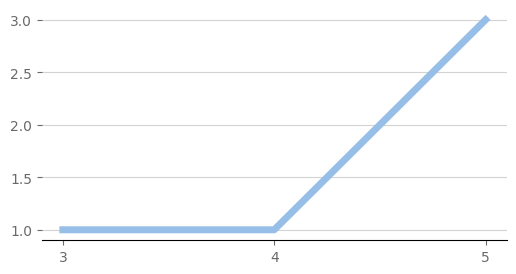

In [22]:
x = [3, 4, 5]
y = [
    won(df_expectimax_3).count()['Max Tile'],    
    won(df_expectimax_4).count()['Max Tile'],    
    won(df_expectimax_5).count()['Max Tile'],   
]

line_plot(x, y, color_psu_pugh_blue)

In [23]:
(	
    won(df_mcts_48).count()['Max Tile'],
    won(df_mcts_96).count()['Max Tile'],    
    won(df_mcts_192).count()['Max Tile'],    
)

(np.int64(3), np.int64(15), np.int64(19))

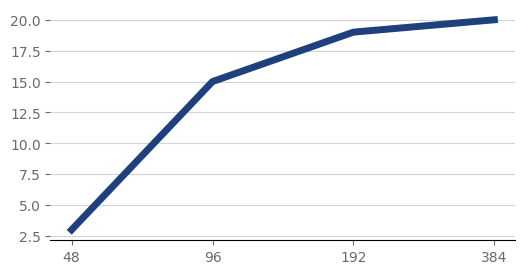

In [24]:
x = [48, 96, 192, 384]
y = [
    won(df_mcts_48).count()['Max Tile'],    
    won(df_mcts_96).count()['Max Tile'],    
    won(df_mcts_192).count()['Max Tile'],  
    won(df_mcts_384).count()['Max Tile'],  
]

line_plot(x, y)

# Avg iterations

In [25]:
df_random['Iterations'].mean()

np.float64(119.055)

In [26]:
(
    df_expectimax_3['Iterations'].mean(),
    df_expectimax_4['Iterations'].mean(),
    df_expectimax_5['Iterations'].mean(),
)

(np.float64(547.18), np.float64(465.55), np.float64(630.165))

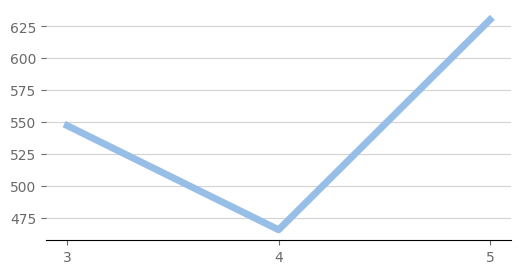

In [27]:
x = [3, 4, 5]
y = [
    df_expectimax_3['Iterations'].mean(),
    df_expectimax_4['Iterations'].mean(),
    df_expectimax_5['Iterations'].mean(), 
]

line_plot(x, y, color_psu_pugh_blue)

In [28]:
(
    df_mcts_48['Iterations'].mean(),
    df_mcts_96['Iterations'].mean(),
    df_mcts_192['Iterations'].mean(),   
)

(np.float64(601.735), np.float64(694.93), np.float64(766.7))

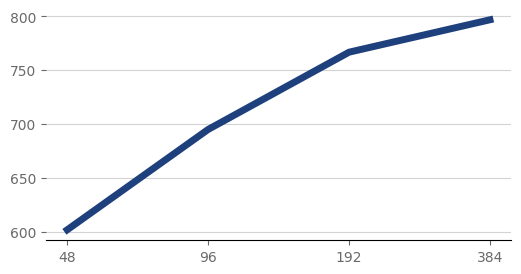

In [29]:
x = [48, 96, 192, 384]
y = [
    df_mcts_48['Iterations'].mean(),
    df_mcts_96['Iterations'].mean(),
    df_mcts_192['Iterations'].mean(),
    df_mcts_384['Iterations'].mean(),    
]

line_plot(x, y)

# Avg time (s) per iteration

In [30]:
(
    sum((df_expectimax_3['Time (s)'] / df_expectimax_3['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_4['Time (s)'] / df_expectimax_4['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_5['Time (s)'] / df_expectimax_5['Iterations']).values) / ITERATION_COUNT,    
)   

(np.float64(0.011309717347326775),
 np.float64(0.050585299867260874),
 np.float64(0.524632865478692))

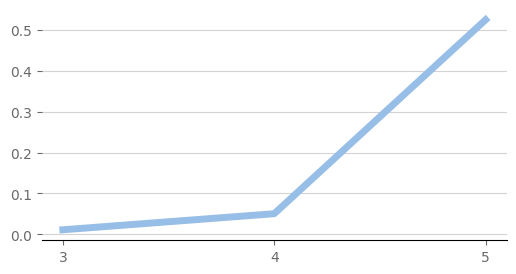

In [31]:
x = [3, 4, 5]
y = [
    sum((df_expectimax_3['Time (s)'] / df_expectimax_3['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_4['Time (s)'] / df_expectimax_4['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_5['Time (s)'] / df_expectimax_5['Iterations']).values) / ITERATION_COUNT,   
]

line_plot(x, y, color_psu_pugh_blue)

In [32]:
(
    sum((df_mcts_48['Time (s)'] / df_mcts_48['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_96['Time (s)'] / df_mcts_96['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_192['Time (s)'] / df_mcts_192['Iterations']).values) / ITERATION_COUNT,    
    sum((df_mcts_384['Time (s)'] / df_mcts_384['Iterations']).values) / ITERATION_COUNT,        
)   

(np.float64(0.07479495816703109),
 np.float64(0.1499709580132559),
 np.float64(0.3070649595937428),
 np.float64(0.6210042631837708))

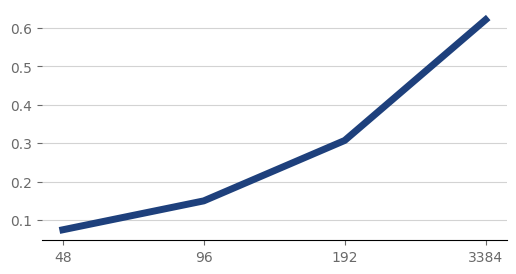

In [33]:
x = [48, 96, 192, 3384]
y = [
    sum((df_mcts_48['Time (s)'] / df_mcts_48['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_96['Time (s)'] / df_mcts_96['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_192['Time (s)'] / df_mcts_192['Iterations']).values) / ITERATION_COUNT,    
    sum((df_mcts_384['Time (s)'] / df_mcts_384['Iterations']).values) / ITERATION_COUNT,        
]

line_plot(x, y)

# Avg time (s) to win

In [34]:
(
    won(df_expectimax_3)['Time (s)'].mean(),
    won(df_expectimax_4)['Time (s)'].mean(),
    won(df_expectimax_5)['Time (s)'].mean(),    
)

(np.float64(13.8077), np.float64(51.9606), np.float64(489.5878666666667))

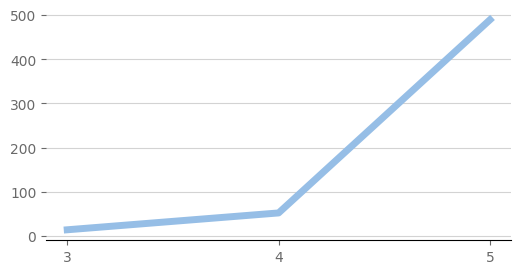

In [35]:
x = [3, 4, 5]
y = [
    won(df_expectimax_3)['Time (s)'].mean(),
    won(df_expectimax_4)['Time (s)'].mean(),
    won(df_expectimax_5)['Time (s)'].mean(),    
]

line_plot(x, y, color_psu_pugh_blue)

In [36]:
(
    won(df_mcts_48)['Time (s)'].mean(),
    won(df_mcts_96)['Time (s)'].mean(),
    won(df_mcts_192)['Time (s)'].mean(),
    won(df_mcts_384)['Time (s)'].mean()    
)

(np.float64(85.76943333333334),
 np.float64(171.32769333333331),
 np.float64(386.1465105263158),
 np.float64(801.589475))

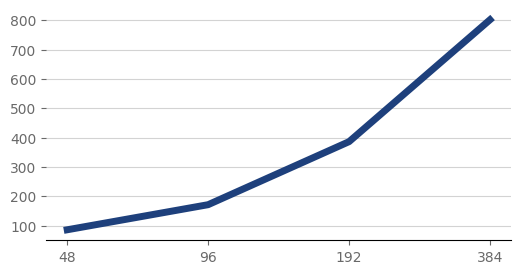

In [37]:
x = [48, 96, 192, 384]
y = [
    won(df_mcts_48)['Time (s)'].mean(),
    won(df_mcts_96)['Time (s)'].mean(),
    won(df_mcts_192)['Time (s)'].mean(),
    won(df_mcts_384)['Time (s)'].mean()
]

line_plot(x, y)

## Average time executing

In [38]:
(
    df_expectimax_3['Time (s)'].mean(),
    df_expectimax_4['Time (s)'].mean(),
    df_expectimax_5['Time (s)'].mean(),    
)

(np.float64(6.079629499999999), np.float64(22.722314), np.float64(318.2755645))

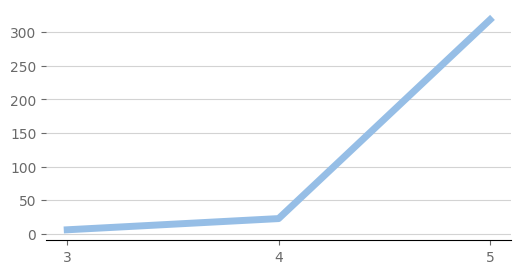

In [39]:
x = [3, 4, 5]
y = [
    df_expectimax_3['Time (s)'].mean(),
    df_expectimax_4['Time (s)'].mean(),
    df_expectimax_5['Time (s)'].mean(),    
]

line_plot(x, y, color_psu_pugh_blue)

In [40]:
(
    df_mcts_48['Time (s)'].mean(),
    df_mcts_96['Time (s)'].mean(),
    df_mcts_192['Time (s)'].mean(),
    df_mcts_384['Time (s)'].mean()    
)

(np.float64(42.818377999999996),
 np.float64(99.340267),
 np.float64(226.2803845),
 np.float64(477.762292))

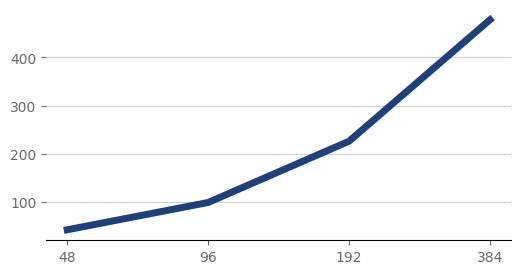

In [41]:
x = [48, 96, 192, 384]
y = [
    df_mcts_48['Time (s)'].mean(),
    df_mcts_96['Time (s)'].mean(),
    df_mcts_192['Time (s)'].mean(),
    df_mcts_384['Time (s)'].mean()
]

line_plot(x, y)

# Avg iterations to win

In [42]:
(
    won(df_expectimax_3)['Iterations'].mean(),
    won(df_expectimax_4)['Iterations'].mean(),    
    won(df_expectimax_5)['Iterations'].mean()
)

(np.float64(1413.0), np.float64(1397.0), np.float64(1249.6666666666667))

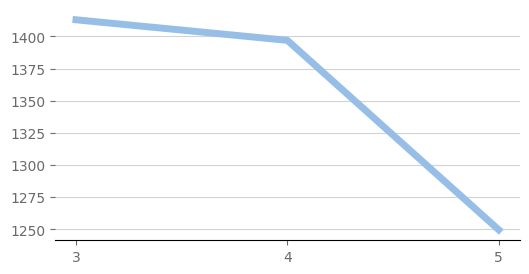

In [43]:
x = [3, 4, 5]
y = [
    won(df_expectimax_3)['Iterations'].mean(),
    won(df_expectimax_4)['Iterations'].mean(),    
    won(df_expectimax_5)['Iterations'].mean() 
]

line_plot(x, y, color_psu_pugh_blue)

In [44]:
(
    won(df_mcts_48)['Iterations'].mean(),
    won(df_mcts_96)['Iterations'].mean(),
    won(df_mcts_192)['Iterations'].mean()
)

(np.float64(1340.0),
 np.float64(1293.7333333333333),
 np.float64(1416.157894736842))

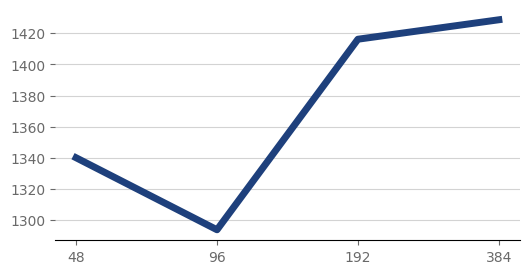

In [45]:
x = [48, 96, 192, 384]
y = [
    won(df_mcts_48)['Iterations'].mean(),
    won(df_mcts_96)['Iterations'].mean(),
    won(df_mcts_192)['Iterations'].mean(),
    won(df_mcts_384)['Iterations'].mean()    
]

line_plot(x, y)

# Avg max tiles

In [46]:
df_random['Max Tile'].mean()

np.float64(108.88)

In [47]:
(
    df_expectimax_3['Max Tile'].mean(),
    df_expectimax_4['Max Tile'].mean(),
    df_expectimax_5['Max Tile'].mean(),    
)

(np.float64(662.4), np.float64(556.16), np.float64(786.56))

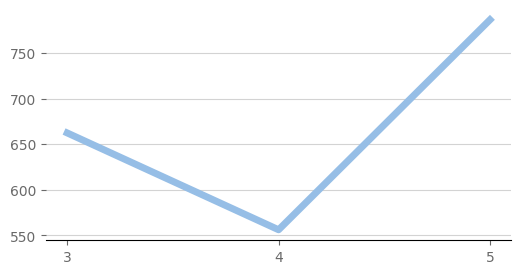

In [48]:
x = [3, 4, 5]
y = [
    df_expectimax_3['Max Tile'].mean(),
    df_expectimax_4['Max Tile'].mean(),
    df_expectimax_5['Max Tile'].mean(),    
]

line_plot(x, y, color_psu_pugh_blue)

In [49]:
(
    df_mcts_48['Max Tile'].mean(),
    df_mcts_96['Max Tile'].mean(),
    df_mcts_192['Max Tile'].mean(),    
)

(np.float64(724.48), np.float64(869.76), np.float64(924.16))

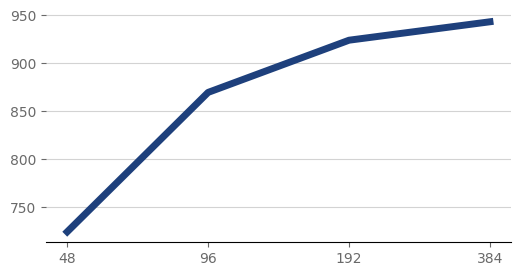

In [50]:
x = [48, 96, 192, 384]
y = [
    df_mcts_48['Max Tile'].mean(),
    df_mcts_96['Max Tile'].mean(),
    df_mcts_192['Max Tile'].mean(),    
    df_mcts_384['Max Tile'].mean(),        
]

line_plot(x, y)